<a href="https://colab.research.google.com/github/garypapa/ML/blob/main/Exercise_5_Papadopoulou_Garyfallia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image

#Question 1

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


#Question 2

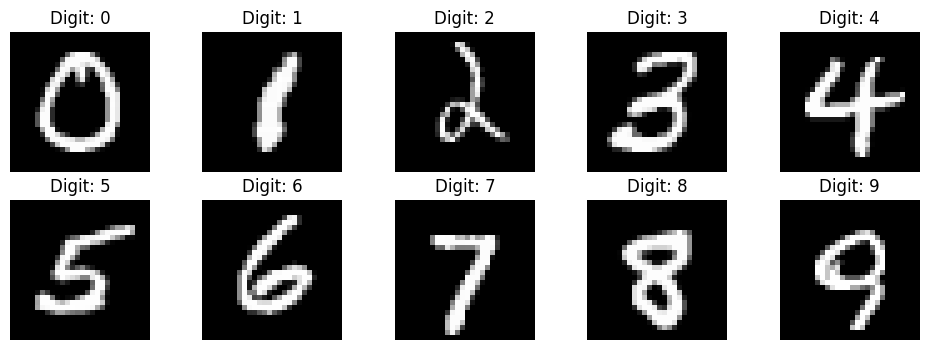

In [ ]:
example_images = []

for digit in range(10):
    indices = np.where(y_train == digit)[0]
    random_index = np.random.choice(indices)
    example_images.append(x_train[random_index])

plt.figure(figsize=(12, 4))

for i, img in enumerate(example_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit: {i}")
    plt.axis('off')

plt.show()

#Question 3

Each image is 28x28 pixels. Not all pixels are important, because the pixels in the background are black. The important pixels are the ones that form the digit.

#Question 4

In [ ]:
x_train_vec = x_train.reshape((x_train.shape[0], -1))
x_test_vec = x_test.reshape((x_test.shape[0], -1))

print("New x_train shape:", x_train_vec.shape)
print("New x_test shape:", x_test_vec.shape)

New x_train shape: (60000, 784)
New x_test shape: (10000, 784)


#Question 5

In [ ]:
N = x_train_vec.shape[0]
k_sqrt = int(math.sqrt(N))
k_values = [5, 15, 51, k_sqrt]
print(k_values)

[5, 15, 51, 244]


In [ ]:
train_acc = []
test_acc = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_vec, y_train)

    pred_train = knn.predict(x_train_vec)
    pred_test = knn.predict(x_test_vec)

    train_acc.append(accuracy_score(y_train, pred_train))
    test_acc.append(accuracy_score(y_test, pred_test))

print("Train accuracies:", train_acc)
print("Test accuracies:", test_acc)

Train accuracies: [0.9819166666666667, 0.971, 0.9532333333333334, 0.9210666666666667]
Test accuracies: [0.9688, 0.9633, 0.9533, 0.9241]


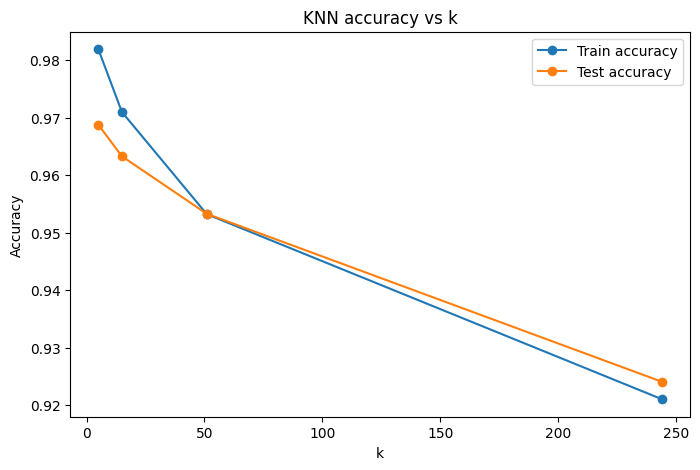

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(k_values, train_acc, marker='o', label="Train accuracy")
plt.plot(k_values, test_acc, marker='o', label="Test accuracy")

plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN accuracy vs k")
plt.legend()
plt.show()

#Question 6

In [ ]:
x_train_norm = x_train_vec / 255
x_test_norm = x_test_vec / 255

train_acc_norm = []
test_acc_norm = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_norm, y_train)

    pred_train = knn.predict(x_train_norm)
    pred_test = knn.predict(x_test_norm)

    train_acc_norm.append(accuracy_score(y_train, pred_train))
    test_acc_norm.append(accuracy_score(y_test, pred_test))

print("Train accuracies normalized:", train_acc_norm)
print("Test accuracies normalized:", test_acc_norm)

Train accuracies normalized: [0.9819166666666667, 0.971, 0.9532333333333334, 0.9210666666666667]
Test accuracies normalized: [0.9688, 0.9633, 0.9533, 0.9241]


After dividing the pixel values by 255, the accuracy did not change.
The MNIST images are already in similar grayscale values, so scaling them does not really affect the distances between samples.
Because KNN compares distances, the results stay the same.

#Question 7

In [ ]:
img = Image.open("digit.png").convert("L")
img = img.resize((28, 28))

img_arr = np.array(img)

img_vec = img_arr.reshape(1, -1)

img_vec = img_vec / 255

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_norm, y_train)

prediction = knn.predict(img_vec)
print("Predicted digit:", prediction[0])

Predicted digit: 2


I didn't draw the digit well and it was different from the MNIST samples, so the classifier confused my 7 with 2.